In [5]:
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


標題: “感受到中國經濟的強大韌性和活力”--新聞報道-中國共產黨新聞網
連結: http://cpc.people.com.cn/BIG5/n1/2023/1203/c64387-40130559.html&ved=2ahUKEwiS78q16vKCAxVosVYBHRSKCq0QxfQBegQICBAC&usg=AOvVaw0e_vEkRLSR03o4atAmV40_
---
標題: 歡迎各國工商界朋友繼續投資中國、深耕中國--新聞報道-中國共產黨 ...
連結: http://cpc.people.com.cn/BIG5/n1/2023/1203/c64387-40130561.html&ved=2ahUKEwiS78q16vKCAxVosVYBHRSKCq0QxfQBegQICRAC&usg=AOvVaw2MoQpv2kGg9gJEVAjeGQl2
---
標題: 中國拉抬經濟對歐洲5國免簽首日法國入境增幅最多- Rti央廣
連結: https://www.rti.org.tw/news/view/id/2188536&ved=2ahUKEwiS78q16vKCAxVosVYBHRSKCq0QxfQBegQIBxAC&usg=AOvVaw155h0Z6GRwMNskzCitVgOD
---
標題: 不斷以中國新發展為世界帶來新動力、新機遇--新聞報道-中國共產黨 ...
連結: http://cpc.people.com.cn/BIG5/n1/2023/1203/c64387-40130552.html&ved=2ahUKEwiS78q16vKCAxVosVYBHRSKCq0QxfQBegQIARAC&usg=AOvVaw2ronYoNXUOb5SW11cDwbyg
---
標題: 十年河東十年河西 中國巨變的一年
連結: https://udn.com/news/story/6809/7614949%3Ffrom%3Dudn-catelistnews_ch2&ved=2ahUKEwiS78q16vKCAxVosVYBHRSKCq0QxfQBegQIBBAC&usg=AOvVaw0ACVzJt4x-UYipEMiQ9jSu
---
標題: 美商務部長雷蒙多：中國非朋友須阻獲取先進半導體技術
連結: https://udn.com/news/story/733

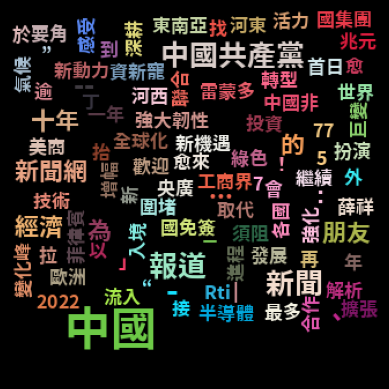

文字雲圖片已儲存為: 20231203_中國.png


In [6]:

def main():
    # Google News初始化設定
    googlenews = GoogleNews()
    googlenews.setlang('zh-tw')
    googlenews.setperiod('d')
    
    # 使用者輸入關鍵字
    keyword = input("請輸入要搜尋的關鍵字: ")
    googlenews.search(keyword)

    # 獲取搜尋結果
    result = googlenews.result()

    # 顯示新聞標題和連結
    for item in result:
        print(f"標題: {item['title']}")
        print(f"連結: {item['link']}")
        print('---')

    # 進行斷詞處理並計算詞頻
    all_titles = ' '.join([item['title'] for item in result])
    words = jieba.cut(all_titles)
    word_count = Counter(words)

    # 顯示斷詞統計表格
    df = pd.DataFrame(word_count.items(), columns=['word', 'count'])
    df_sorted = df.sort_values(by='count', ascending=False).reset_index(drop=True)
    print(df_sorted.head(20))  # 顯示前20個最常出現的詞
    
        
    # 詢問使用者字體檔案路徑
    font_path_input = input("請輸入中文字體的檔案路徑: ")
    # 文字雲圖片遮罩檔案路徑
    img_path = "/Users/larry/Github/Python-WordCloud/img/color.png"
    
    # 取遮罩圖片
    mask_color = np.array(Image.open(img_path))
    # 每隔3個像素取一個像素
    mask_color = mask_color[::3, ::3]
    # 處理遮罩圖片 黑色區域不會生成圖片
    mask_image = mask_color.copy()
    threshold = 2  # 根據圖片調整閾值
    mask_image[np.all(mask_image < threshold, axis=2)] = 255
    # 邊緣檢測
    edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
    mask_image[edges > .08] = 255
    # 顏色生成
    image_colors = ImageColorGenerator(mask_image)
    image_colors.default_color = [0.9,0.9,0.9]

    
    # 生成文字雲
    wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


    # 儲存文字雲圖片
    today = datetime.now().strftime('%Y%m%d')
    image_filename = f"{today}_{keyword}.png"
    wordcloud.to_file(image_filename)
    print(f"文字雲圖片已儲存為: {image_filename}")

if __name__ == "__main__":
    main()
